Total Quantity: product_name
Basketball        63
Blanket           93
Carpet            69
Dress             77
Eraser            82
Headphones        89
Laptop           113
Notebook          81
Novel             48
Painting          75
Pants             95
Pen               71
Pillow            84
Running Shoes     81
Shirt             50
Skirt             85
Smartphone       112
Smartwatch        79
Soccer Ball       96
Story Book        79
T-shirt          112
Tablet            88
Tent              86
Vase              87
Yoga Mat          98
Name: quantity, dtype: int64
Average Price: 257.13833564493757
Total Revenue: 535307.71
Total Revenue per Product: product_name
Basketball       18463.70
Blanket          22607.73
Carpet           17075.15
Dress            19944.82
Eraser           18173.47
Headphones       23771.30
Laptop           28765.94
Notebook         26606.45
Novel            12357.22
Painting         21050.34
Pants            23116.51
Pen              18129.53
Pillow

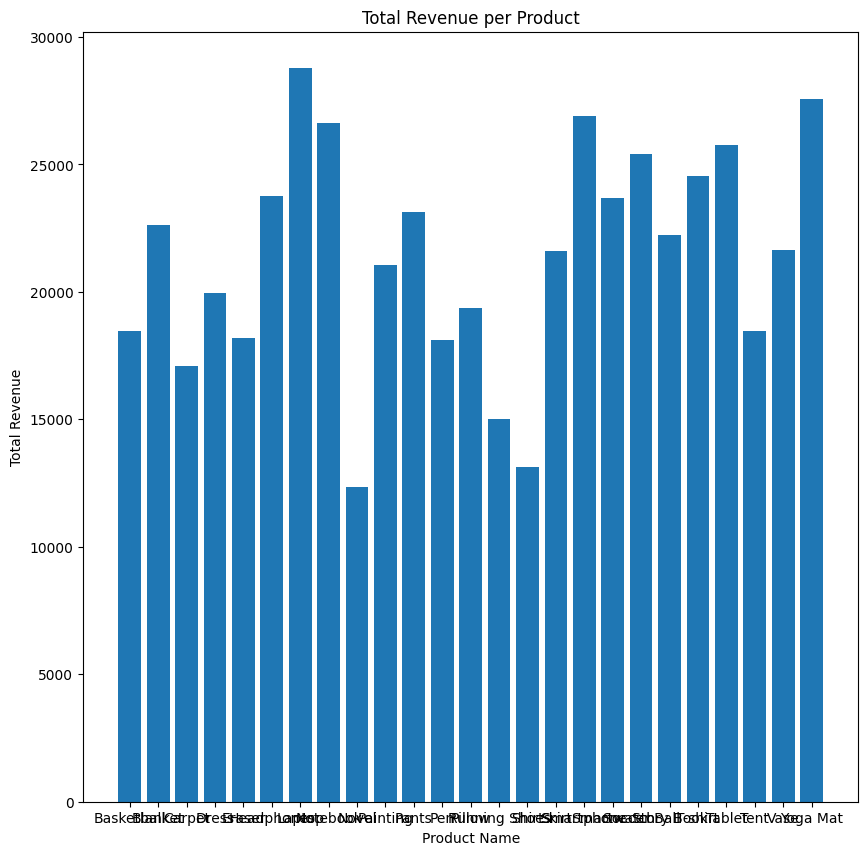

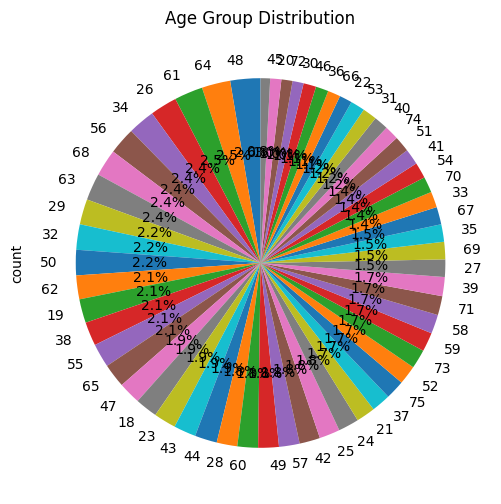

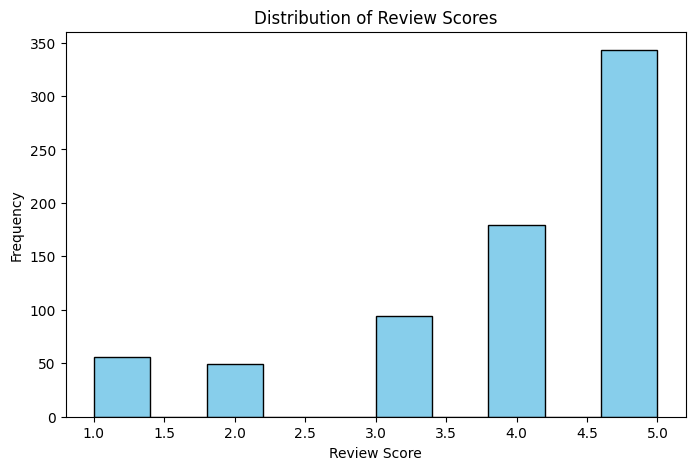

In [ ]:

#1,2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('sample_data/retail_sales_data.csv')
df.dropna(inplace=True)
df['order_date']=pd.to_datetime(df['order_date'])

#3
df['TotalPrice']=df['quantity']*df['price']
total_quantity=df.groupby('product_name')['quantity'].sum()
average_price=np.mean(df['price'])
total_revenue=np.sum(df['TotalPrice'])
total_revenue_per_product=df.groupby('product_name')['TotalPrice'].sum()
average_price_per_product=df.groupby('product_name')['price'].mean()
age_group_counts=df['age'].value_counts()
summary=df.describe()

#i dont recommend using .describe since it will be applied on all columns including the customer id and date i added it just for the info

print('Total Quantity:',total_quantity)
print('Average Price:',average_price)
print('Total Revenue:',total_revenue)
print('Total Revenue per Product:',total_revenue_per_product)
print('Average Price per Product:',average_price_per_product)


#4

def categorize_demand(row):
  if row['quantity'] <= 1:
    return 'Low demand'
  elif row['quantity']>1 and row['quantity']<5:
    return 'Medium demand'
  else:
    return 'High demand'

df['demand_category']=df.apply(categorize_demand,axis=1)
print(df['demand_category'])


#5

def calculate_total_revenue(df):
    df['TotalPrice']=df['quantity']*df['price']
    return np.sum(df['TotalPrice'])

def calculate_total_revenue_per_product(df):
  return df.groupby('product_name')['TotalPrice'].sum()

def calculate_average_price_per_product(df):
  return df.groupby('product_name')['price'].mean()

print('Total Revenue:',calculate_total_revenue(df))
print('Total Revenue per Product:',calculate_total_revenue_per_product(df))
print('Average Price per Product:',calculate_average_price_per_product(df))

#6

plt.figure(figsize=(10,10))
revenue_per_product=df.groupby('product_name')['TotalPrice'].sum()
plt.bar(revenue_per_product.index,revenue_per_product.values)
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.title('Total Revenue per Product')
plt.show()

plt.figure(figsize=(10,6))
age_group_counts.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Age Group Distribution')
plt.show()

plt.figure(figsize=(8,5))
plt.hist(df['review_score'],bins=10,color='skyblue',edgecolor='black')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.title('Distribution of Review Scores')
plt.show()







